# 과제1. 직원 이직 분석

* 회사 인사팀에서는 AIVLER 들에게 직원의 이직여부과 관련해서 분석을 요청하였습니다.
* 최근 이직율이 증가하는 것에 대해 우려를 갖고 있기에, 이직여부에 영향을 주는 요인에 대해 분석하여, 직원들이 회사를 떠나지 않도록 인사 프로그램을 준비하려고 합니다.
* 필요하다면, 검색을 통해 '직원이 회사를 떠나는 이유' 등을 찾아보는 것은 데이터 분석을 하는데 도움이 될 것입니다.
* 자, 이제 인사팀에서 제공한 데이터를 바탕으로 각각 개별 변수의 분포를 살펴보며, 비즈니스 인사이트를 최대한 도출해 봅시다.


![](https://adoptostaging.blob.core.windows.net/media/employee-attrition-reasons-9LIqMv.jpg)

## 0.환경설정

### 1) 라이브러리 로딩

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from statsmodels.graphics.mosaicplot import mosaic
from scipy import stats as spst
import statsmodels.api as sm

### 2) 데이터 로딩

In [2]:
# data data
path = "https://raw.githubusercontent.com/DA4BAM/dataset/master/Attrition_NA.CSV"
data = pd.read_csv(path)
data.drop(['EducationField', 'Education','JobInvolvement', 'StockOptionLevel', 'BusinessTravel','YearsWithCurrManager'
,'YearsInCurrentRole','JobRole', 'Department','EmployeeNumber','EnvironmentSatisfaction','TrainingTimesLastYear','YearsAtCompany']
          , axis = 1, inplace = True)
data['Attrition'] = np.where(data['Attrition']=='Yes', 1, 0)
data.head(10)

,Attrition,Age,DistanceFromHome,Gender,JobSatisfaction,MaritalStatus,MonthlyIncome,NumCompaniesWorked,OverTime,PercentSalaryHike,RelationshipSatisfaction,TotalWorkingYears,WorkLifeBalance
0,0,33,7.0,Male,3,Married,11691,0.0,No,11,4,14,4
1,0,35,18.0,Male,4,Single,9362,2.0,No,11,3,10,3
2,0,42,6.0,Male,1,Married,13348,9.0,No,13,2,18,4
3,0,46,2.0,Female,1,Married,17048,8.0,No,23,1,28,3
4,0,39,NaN,Male,4,Divorced,4127,2.0,No,18,4,7,3
5,1,22,4.0,Male,3,Single,3894,5.0,No,16,3,4,3
6,0,24,21.0,Male,1,Divorced,2296,0.0,No,14,2,2,3
7,0,34,8.0,Male,3,Married,4404,2.0,No,12,1,6,4
8,0,30,20.0,Male,1,Married,9957,0.0,No,15,3,7,2
9,0,26,6.0,Female,4,Married,2659,1.0,Yes,13,3,3,3


|	구분	|	변수 명	|	내용	|	type	|	비고	|
|	----	|	----	|	----	|	----	|	----	|
|	**Target**	|	**Attrition**	|	이직여부, Yes , No	|	범주	| 1- 이직, 0- 잔류		|
|	feature	|	Age	|	나이	|	숫자	|		|
|	feature	|	DistanceFromHome	|	집-직장 거리	|	숫자	|	마일	|
|	feature	|	Gender	|	성별	|	범주	| Male, Female		|
|	feature	|	JobSatisfaction	|	직무 만족도	|	범주	|	1 Low, 2 Medium, 3 High, 4 Very High	|
|	feature	|	MaritalStatus	|	결혼상태	|	범주	| Single, Married, Divorced		|
|	feature	|	MonthlyIncome	|	월급	|	숫자	| 달러	|
|	feature	|	NumCompaniesWorked	|	입사 전 근무한 회사 수	|	숫자	|	0 - 우리회사가 첫 직장	|
|	feature	|	RelationshipSatisfaction	|	동료와의 관계	|	범주	| 1 Low, 2 Medium, 3 High, 4 Very High		|
|	feature	|	OverTime	|	야근여부	|	범주	|	Yes, No	|
|	feature	|	PercentSalaryHike	|	전년대비 급여인상율	|	숫자	|	%	|
|	feature	|	TotalWorkingYears	|	총 경력 연수	|	숫자	|		|
|	feature	|	WorkLifeBalance	|	워라밸. 일-삶 균형도	|	범주	|	1 Bad, 2 Good, 3 Better, 4 Best	|

----

## 1.가설수립

* 여기서는 가설을 생략합니다.

----

## 2.단변량 분석

① 변수의 비즈니스 의미  

② 숫자? 범주?  

③ NaN 존재 여부 및 조치 방안  

④ 기초통계량  

⑤ 분포  

⑥ 위 정보로부터 파악한 내용(비즈니스!) 정리  

⑦ 추가 분석해볼 사항 도출

## 3.이변량 분석 d

* 자료의 종류에 맞게 X --> Y 에 대해서 그래프(시각화)와 가설검정(수치화)를 수행하고 결과를 평가합니다.
* 가설검정시 다음의 항목을 참조하여 수행합니다.
    * 유의수준 : 5%
    * 숫자 --> 숫자 : 상관분석
    * 범주 --> 범주 : 카이제곱검정
    * 범주 --> 숫자 : t검정, 분산분석
    * 숫자 --> 범주 : 로지스틱 회귀모형을 통해, 회귀계수의 P.value로 검정을 수행합니다.
* (옵션)자료에 대한 가정 검정.(정규성, 등분산성 등)

### (1) 범주형 Feature --> Target
* 모든 범주형 Feature에 대해서 Y와 비교하여 차트를 그리고 수치화 하시오.  
    ① 교차표(pd.crosstab())  
    ② 시각화( Stacked Bar, Mosaic)  
    ③ 가설검정(카이제곱검정)
* 각 feature 별로 관계의 정도를 3가지로 정리해봅시다. 

#### 1) Gender --> Attrition	

① 교차표(pd.crosstab())

In [11]:
pd.crosstab(data['Gender'], data['Attrition'], normalize = 'index')

Attrition,0,1
Gender,,
Female,0.859184,0.140816
Male,0.827632,0.172368


② 시각화( Stacked Bar, Mosaic)

Attrition         0         1
Gender                       
Female     0.859184  0.140816
Male       0.827632  0.172368


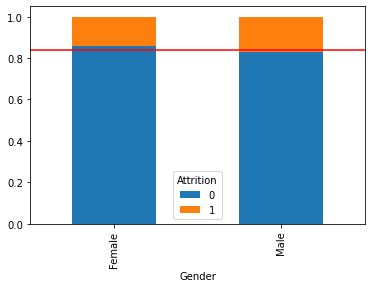

In [9]:
temp = pd.crosstab(data['Gender'], data['Attrition'], normalize = 'index')
print(temp)
temp.plot.bar(stacked=True)
plt.axhline(1-data['Attrition'].mean(), color = 'r')
plt.show()

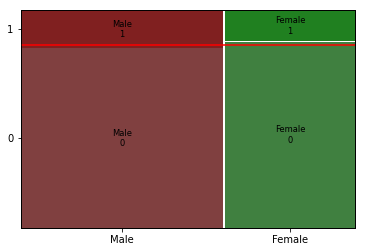

In [8]:
mosaic(data, ['Gender', 'Attrition'])
plt.axhline(1- data['Attrition'].mean(), color = 'r')
plt.show()

시각화를 통해 파악한 내용을 적어 봅시다.

In [ ]:
남자가 이직률이 높다

③ 가설검정(카이제곱검정)

In [13]:
table = pd.crosstab(data['Attrition'], data['Gender'])
print('교차표\n', table)
print('-' * 100)

# 카이제곱검정
result = spst.chi2_contingency(table)
print('카이제곱통계량', result[0])
print('p-value', result[1])
print('자유도', result[2])
print('기대빈도\n',result[3])

교차표
 Gender     Female  Male
Attrition              
0             421   629
1              69   131
----------------------------------------------------------------------------------------------------
카이제곱통계량 1.9782495940105371
p-value 0.15957492990528155
자유도 1
기대빈도
 [[411.6 638.4]
 [ 78.4 121.6]]


④ 시각화와 가설검정을 통해서 파악한 내용을 적어 봅시다.

In [ ]:
전체적인 비율이 크게 차이 나지는 않으므로 약한 관계인것같다

#### 2) MaritalStatus --> Attrtion

① 교차표(pd.crosstab())

In [15]:
pd.crosstab(data['MaritalStatus'], data['Attrition'], normalize = 'index')

Attrition,0,1
MaritalStatus,,
Divorced,0.916667,0.083333
Married,0.878947,0.121053
Single,0.732673,0.267327


② 시각화( Stacked Bar, Mosaic)

Attrition             0         1
MaritalStatus                    
Divorced       0.916667  0.083333
Married        0.878947  0.121053
Single         0.732673  0.267327


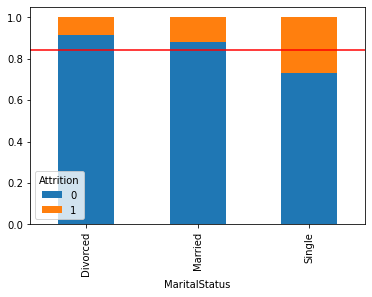

In [16]:
temp = pd.crosstab(data['MaritalStatus'], data['Attrition'], normalize = 'index')
print(temp)
temp.plot.bar(stacked=True)
plt.axhline(1-data['Attrition'].mean(), color = 'r')
plt.show()

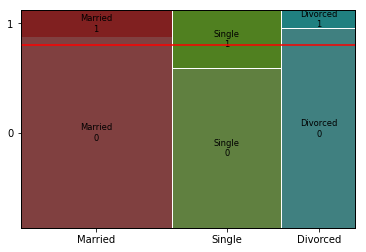

In [17]:
mosaic(data, ['MaritalStatus', 'Attrition'])
plt.axhline(1- data['Attrition'].mean(), color = 'r')
plt.show()

시각화를 통해 파악한 내용을 적어 봅시다.

In [ ]:
이혼 결혼 싱글 순으로 이직률이 높다

③ 가설검정(카이제곱검정)

In [18]:
table = pd.crosstab(data['Attrition'], data['MaritalStatus'])
print('교차표\n', table)
print('-' * 100)

# 카이제곱검정
result = spst.chi2_contingency(table)
print('카이제곱통계량', result[0])
print('p-value', result[1])
print('자유도', result[2])
print('기대빈도\n',result[3])

교차표
 MaritalStatus  Divorced  Married  Single
Attrition                               
0                   253      501     296
1                    23       69     108
----------------------------------------------------------------------------------------------------
카이제곱통계량 53.12935546374186
p-value 2.9047385436211595e-12
자유도 2
기대빈도
 [[231.84 478.8  339.36]
 [ 44.16  91.2   64.64]]


④ 시각화와 가설검정을 통해서 파악한 내용을 적어 봅시다.

In [58]:
결혼보다 싱글이 이직률이 높은건 아직 책임질 가장이 아닐 확률이 높기때문이다.
이혼이 결혼보다 이직률이 낮은건 이혼으로인한 경제 비용부담이 늘었기 때문으로 생각된다 (양육비 등)
앞의 내용으로 봐서 강한 관계인것같다.

SyntaxError: invalid syntax (<ipython-input-58-38ade0dc8969>, line 1)

#### 3) JobSatisfaction --> Attrtion

① 교차표(pd.crosstab())

In [19]:
pd.crosstab(data['JobSatisfaction'], data['Attrition'], normalize = 'index')

Attrition,0,1
JobSatisfaction,,
1,0.788000,0.212000
2,0.834043,0.165957
3,0.836957,0.163043
4,0.879093,0.120907


② 시각화( Stacked Bar, Mosaic)

Attrition               0         1
JobSatisfaction                    
1                0.788000  0.212000
2                0.834043  0.165957
3                0.836957  0.163043
4                0.879093  0.120907


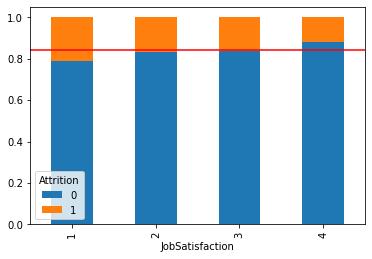

In [20]:
temp = pd.crosstab(data['JobSatisfaction'], data['Attrition'], normalize = 'index')
print(temp)
temp.plot.bar(stacked=True)
plt.axhline(1-data['Attrition'].mean(), color = 'r')
plt.show()

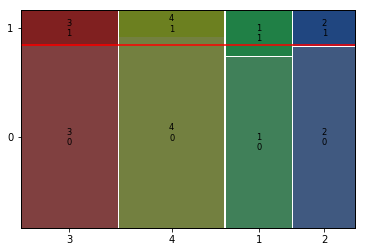

In [21]:
mosaic(data, ['JobSatisfaction', 'Attrition'])
plt.axhline(1- data['Attrition'].mean(), color = 'r')
plt.show()

시각화를 통해 파악한 내용을 적어 봅시다.

In [ ]:
직무 만족도가 높을수록 이직률이 낮다

③ 가설검정(카이제곱검정)

In [22]:
table = pd.crosstab(data['JobSatisfaction'], data['MaritalStatus'])
print('교차표\n', table)
print('-' * 100)

# 카이제곱검정
result = spst.chi2_contingency(table)
print('카이제곱통계량', result[0])
print('p-value', result[1])
print('자유도', result[2])
print('기대빈도\n',result[3])

교차표
 MaritalStatus    Divorced  Married  Single
JobSatisfaction                           
1                      57      120      73
2                      52      107      76
3                      78      171     119
4                      89      172     136
----------------------------------------------------------------------------------------------------
카이제곱통계량 2.251076719768015
p-value 0.8952200066027381
자유도 6
기대빈도
 [[ 55.2    114.      80.8   ]
 [ 51.888  107.16    75.952 ]
 [ 81.2544 167.808  118.9376]
 [ 87.6576 181.032  128.3104]]


④ 시각화와 가설검정을 통해서 파악한 내용을 적어 봅시다.

> 극단적으로 1점일때는 이직률이 높아지고 4점일때는 이직률이 낮아진다. 이것은 회사내 만족도랑 관련있다
그러나 애매해게 2,3점일때 비슷한것로봐서는 중간정도 관계 있는것같다.

#### 4) 추가 --> Attrtion

① 교차표(pd.crosstab())

② 시각화( Stacked Bar, Mosaic)

시각화를 통해 파악한 내용을 적어 봅시다.

③ 가설검정(카이제곱검정)

④ 시각화와 가설검정을 통해서 파악한 내용을 적어 봅시다.

#### 5) 추가 --> Attrtion

① 교차표(pd.crosstab())

② 시각화( Stacked Bar, Mosaic)

시각화를 통해 파악한 내용을 적어 봅시다.

③ 가설검정(카이제곱검정)

④ 시각화와 가설검정을 통해서 파악한 내용을 적어 봅시다.

### (2) 숫자형 Feature --> target

* 숫자형 Feature에 대해서 Y와 비교하여 차트를 그리고 수치화 하시오.  
    ① 그래프 : histogram, densityplot   
    ② 수치화 : 로지스틱회귀

#### 1) Age --> Attrition


① 그래프 : histogram, densityplot

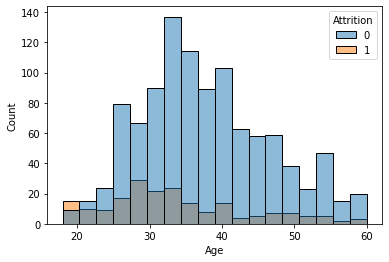

In [25]:
sns.histplot(x='Age', data = data, hue = 'Attrition')
plt.show()

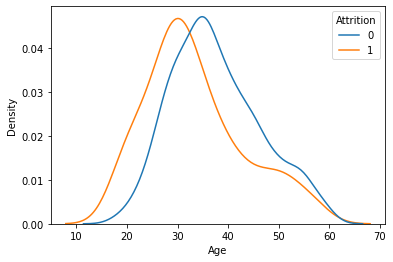

In [27]:
sns.kdeplot(x='Age', data = data, hue ='Attrition', common_norm = False)
plt.show()

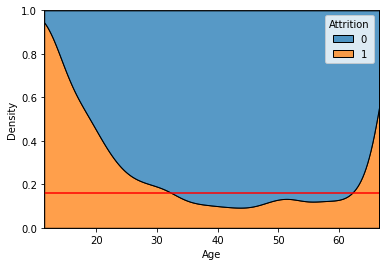

In [29]:
sns.kdeplot(x='Age', data = data, hue ='Attrition'
            , multiple = 'fill')
plt.axhline(data['Attrition'].mean(), color = 'r')
plt.show()

시각화를 통해 파악한 내용을 적어 봅시다.

>30대 기점으로 이직률이 낮아지다 은퇴 나이대쯔음 높아진다

② 수치화 : 로지스틱회귀

In [30]:
model = sm.Logit(data['Attrition'], data['Age'])
result = model.fit()
print(result.pvalues)

Optimization terminated successfully.
         Current function value: 0.424660
         Iterations 5
Age    4.667821e-100
dtype: float64


③ 시각화와 수치화를 통해 파악한 내용을 적어 봅시다.

> 0.424660로 나온것으로 봐서 중간 정도 관계인것같다.
나이대에 따른 다른사정으로 인해 이직률이 변동되기 때문인것같다

#### 2) DistanceFromHome --> Attrtion


In [41]:
data.isna().sum()

Attrition                    0
Age                          0
DistanceFromHome            54
Gender                       0
JobSatisfaction              0
MaritalStatus                0
MonthlyIncome                0
NumCompaniesWorked          21
OverTime                     0
PercentSalaryHike            0
RelationshipSatisfaction     0
TotalWorkingYears            0
WorkLifeBalance              0
dtype: int64

In [42]:
data2 = data.copy()
data2.dropna(subset=['DistanceFromHome'],axis=0, inplace=True)
data2.isna().sum()

Attrition                    0
Age                          0
DistanceFromHome             0
Gender                       0
JobSatisfaction              0
MaritalStatus                0
MonthlyIncome                0
NumCompaniesWorked          21
OverTime                     0
PercentSalaryHike            0
RelationshipSatisfaction     0
TotalWorkingYears            0
WorkLifeBalance              0
dtype: int64

① 그래프 : histogram, densityplot

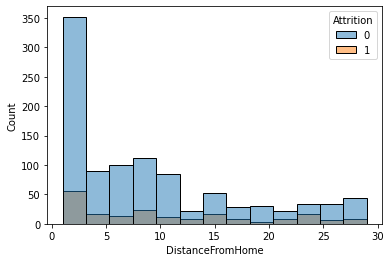

In [43]:
sns.histplot(x='DistanceFromHome', data = data2, hue = 'Attrition')
plt.show()

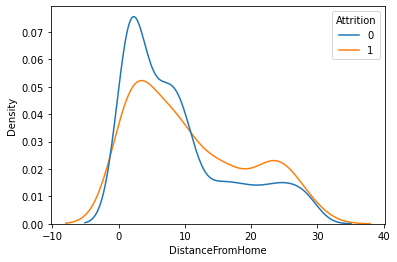

In [44]:
sns.kdeplot(x='DistanceFromHome', data = data2, hue ='Attrition', common_norm = False)
plt.show()

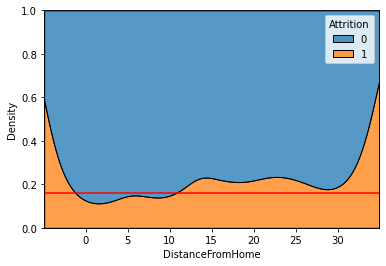

In [45]:
sns.kdeplot(x='DistanceFromHome', data = data2, hue ='Attrition'
            , multiple = 'fill')
plt.axhline(data['Attrition'].mean(), color = 'r')
plt.show()

시각화를 통해 파악한 내용을 적어 봅시다.

> 거리에 따라 점점 이직률이 높아진다

② 수치화 : 로지스틱회귀

In [40]:
model = sm.Logit(data2['Attrition'], data2['DistanceFromHome'])
result = model.fit()
print(result.pvalues)

Optimization terminated successfully.
         Current function value: 0.568793
         Iterations 6
DistanceFromHome    2.694280e-44
dtype: float64


③ 시각화와 수치화를 통해 파악한 내용을 적어 봅시다.

> 0.568793값이 나옴으로 강한 관계인것같다. 이는 거리가 멀수록 출퇴근 시간이 길어지고 이는 자기의 시간이 줄어든다는것을 의미한다. 자기의 삶을 중요시하는사람은 거리 불만을 상쇄할만한 다른 만족할만것이 없으면 이직을 고려하고 시행하는것같다.

#### 3) MonthlyIncome --> Attrtion


① 그래프 : histogram, densityplot

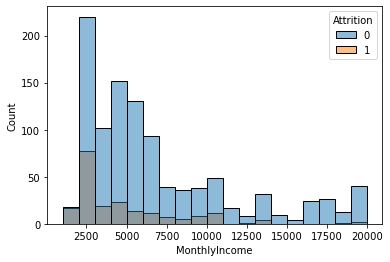

In [47]:
sns.histplot(x='MonthlyIncome', data = data, hue = 'Attrition')
plt.show()

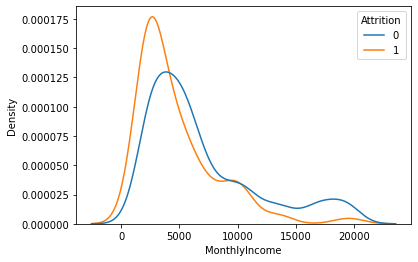

In [48]:
sns.kdeplot(x='MonthlyIncome', data = data, hue ='Attrition', common_norm = False)
plt.show()

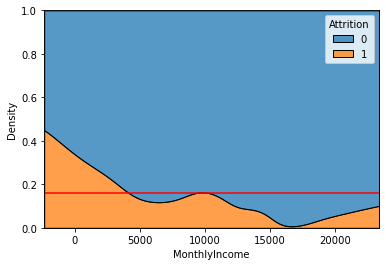

In [49]:
sns.kdeplot(x='MonthlyIncome', data = data, hue ='Attrition'
            , multiple = 'fill')
plt.axhline(data['Attrition'].mean(), color = 'r')
plt.show()

시각화를 통해 파악한 내용을 적어 봅시다.

> 애매한 봉급일때 이직률이 높아진다

② 수치화 : 로지스틱회귀

In [50]:
model = sm.Logit(data2['Attrition'], data2['MonthlyIncome'])
result = model.fit()
print(result.pvalues)

Optimization terminated successfully.
         Current function value: 0.443778
         Iterations 6
MonthlyIncome    7.889510e-68
dtype: float64


③ 시각화와 수치화를 통해 파악한 내용을 적어 봅시다.

>  0.443778로 중간정도 인것같다.  경력에 따른 업계 평균 봉급이 직원마다 알려져있는데 적다고 판단하면 이직을 고려하고 적절하다 생각되면 있는것을 고른다.10000대 전후로 이직률이 변동되는것을 보면 이 봉급대ㅢ 사람들의 경력을 조사해봐서 지금 주는 봉급이 적절한지 파악해야할것같다

#### 4) NumCompaniesWorked --> Attrtion


In [51]:
data.isna().sum()

Attrition                    0
Age                          0
DistanceFromHome            54
Gender                       0
JobSatisfaction              0
MaritalStatus                0
MonthlyIncome                0
NumCompaniesWorked          21
OverTime                     0
PercentSalaryHike            0
RelationshipSatisfaction     0
TotalWorkingYears            0
WorkLifeBalance              0
dtype: int64

In [52]:
data2 = data.copy()
data2.dropna(subset=['NumCompaniesWorked'],axis=0, inplace=True)
data2.isna().sum()

Attrition                    0
Age                          0
DistanceFromHome            54
Gender                       0
JobSatisfaction              0
MaritalStatus                0
MonthlyIncome                0
NumCompaniesWorked           0
OverTime                     0
PercentSalaryHike            0
RelationshipSatisfaction     0
TotalWorkingYears            0
WorkLifeBalance              0
dtype: int64

① 그래프 : histogram, densityplot

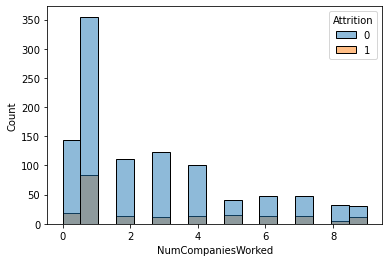

In [54]:
sns.histplot(x='NumCompaniesWorked', data = data2, hue = 'Attrition')
plt.show()

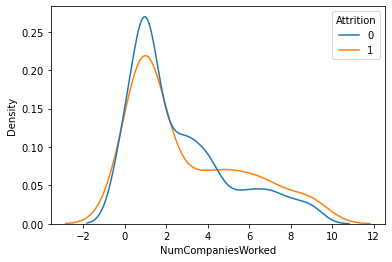

In [55]:
sns.kdeplot(x='NumCompaniesWorked', data = data2, hue ='Attrition', common_norm = False)
plt.show()

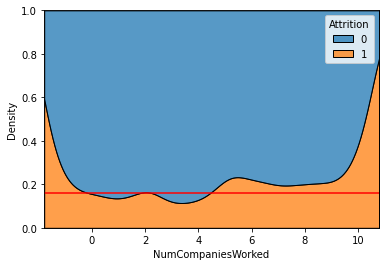

In [57]:
sns.kdeplot(x='NumCompaniesWorked', data = data, hue ='Attrition'
            , multiple = 'fill')
plt.axhline(data['Attrition'].mean(), color = 'r')
plt.show()

시각화를 통해 파악한 내용을 적어 봅시다.

> 4번 이직 이후로 이직률이 높은걸 알수 있다

② 수치화 : 로지스틱회귀

In [56]:
model = sm.Logit(data2['Attrition'], data2['NumCompaniesWorked'])
result = model.fit()
print(result.pvalues)

Optimization terminated successfully.
         Current function value: 0.564716
         Iterations 6
NumCompaniesWorked    2.545612e-45
dtype: float64


③ 시각화와 수치화를 통해 파악한 내용을 적어 봅시다.

> 0.564716으로보아 강한 관계인것같다. 한두번 이직결정이 어렵지 여러번 이직하는것은 본인의 능력을 믿고 더 좋은 조건의 회사로 이직하는것일수도 있다. 좋은 인재를 놓칠수 있으므로 이직을 할때 현재 회사에 잔류를 위한 더 좋은 조건 제시 문제점 개선을 논의해야할것같다.

#### 5) 추가 --> Attrtion


① 그래프 : histogram, densityplot

시각화를 통해 파악한 내용을 적어 봅시다.

> 

② 수치화 : 로지스틱회귀

③ 시각화와 수치화를 통해 파악한 내용을 적어 봅시다.

> 

## 4.관계 정리

### 1) 강한관계의 변수

### 2) 중간관계의 변수

### 3) (거의)관계 없음

## 5. 추가 분석

### 1) 분석1

### 2) 분석2

### 3) 분석3

### 4) 분석4